# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , f1_score
import warnings
warnings.filterwarnings("ignore")

# Read The Data

In [2]:
df = pd.read_csv('wind_turbine_maintenance_data.csv')
df

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label
0,1,15.496714,7.861736,1564.768854,72.615149,73.829233,1.953173,17.896064,67.674347,0
1,1,15.079832,7.840483,1502.222183,62.861035,72.340913,1.976505,11.110395,52.320235,0
2,1,17.559488,8.394233,1512.221917,62.422822,71.998731,2.189488,11.455170,53.644403,0
3,1,15.822545,6.779156,1520.886360,55.201649,68.359070,2.039372,13.692333,61.713683,0
4,1,15.564464,8.025501,1547.319325,68.295953,86.703732,2.214197,10.482082,64.191021,1
...,...,...,...,...,...,...,...,...,...,...
35035,2,14.041303,9.052880,1403.748814,65.538012,72.123338,2.282305,9.390814,68.075873,0
35036,2,14.703166,8.809087,1294.202009,59.602939,79.064765,2.112434,13.204614,52.360664,0
35037,2,15.388032,8.867235,1297.483022,66.055361,86.042779,1.947465,16.487396,61.599800,0
35038,2,15.166837,8.430216,1325.573380,66.105359,65.192135,2.000636,10.735241,46.782986,0


# Data Details

| Feature                    | Description |
|-----------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| Turbine_ID                | Unique identifier for each wind turbine. |
| Rotor_Speed_RPM   | Rotor speed in Revolutions Per Minute (RPM). High RPM may indicate stress, low RPM may signal issues. |
| Wind_Speed_mps       | Wind speed in meters per second (m/s). Extreme values can cause damage or shutdowns. |
| Power_Output_kW   | Electrical power output in kilowatts (kW). A sudden drop can indicate inefficiency or mechanical issues. |
| Gearbox_Oil_Temp_C | Gearbox oil temperature (°C). Overheating may indicate lubrication issues or wear. |
| Generator_Bearing_Temp_C | Generator bearing temperature (°C). High temperatures suggest wear, poor lubrication, or overloading. |
| Vibration_Level_mmps | Vibration level (mm/s). Excessive vibrations could indicate imbalances or loose components. |
| Ambient_Temp_C       | Outside air temperature (°C). Extreme temperatures impact turbine performance. |
| Humidity_pct            | Humidity level (%). High humidity can cause corrosion and electrical issues. |
| Maintenance_Label   | Target Variable:<br>0 - Healthy 🟢<br>1 - Maintenance Suggested 🟡<br>2 - Immediate Maintenance Required 🔴 |


# EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Turbine_ID                35040 non-null  int64  
 1   Rotor_Speed_RPM           35040 non-null  float64
 2   Wind_Speed_mps            35040 non-null  float64
 3   Power_Output_kW           35040 non-null  float64
 4   Gearbox_Oil_Temp_C        35040 non-null  float64
 5   Generator_Bearing_Temp_C  35040 non-null  float64
 6   Vibration_Level_mmps      35040 non-null  float64
 7   Ambient_Temp_C            35040 non-null  float64
 8   Humidity_pct              35040 non-null  float64
 9   Maintenance_Label         35040 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 2.7 MB


In [4]:
#Check The Unique Values of each column
for col in df.columns:
    print(f"{col} --> {df[col].unique()} --> {df[col].nunique()} ")
    print("-"*50)

Turbine_ID --> [1 2] --> 2 
--------------------------------------------------
Rotor_Speed_RPM --> [15.49671415 15.07983181 17.55948803 ... 15.3880319  15.16683654
 16.55584373] --> 35040 
--------------------------------------------------
Wind_Speed_mps --> [7.8617357  7.8404835  8.39423302 ... 8.86723541 8.43021575 6.03169532] --> 35040 
--------------------------------------------------
Power_Output_kW --> [1564.76885381 1502.22218266 1512.22191652 ... 1297.48302229 1325.5733801
 1528.6927052 ] --> 35040 
--------------------------------------------------
Gearbox_Oil_Temp_C --> [72.61514928 62.86103543 62.42282169 ... 66.0553607  66.10535943
 68.90015986] --> 35040 
--------------------------------------------------
Generator_Bearing_Temp_C --> [73.82923313 72.34091295 71.99873075 ... 86.0427787  65.19213541
 71.09177002] --> 35040 
--------------------------------------------------
Vibration_Level_mmps --> [1.95317261 1.9765049  2.18948796 ... 1.9474651  2.00063604 1.99520511] --> 

In [5]:
# check Duplicates
df.duplicated().sum()

0

In [6]:
#check Nulls
df.isnull().sum()

Turbine_ID                  0
Rotor_Speed_RPM             0
Wind_Speed_mps              0
Power_Output_kW             0
Gearbox_Oil_Temp_C          0
Generator_Bearing_Temp_C    0
Vibration_Level_mmps        0
Ambient_Temp_C              0
Humidity_pct                0
Maintenance_Label           0
dtype: int64

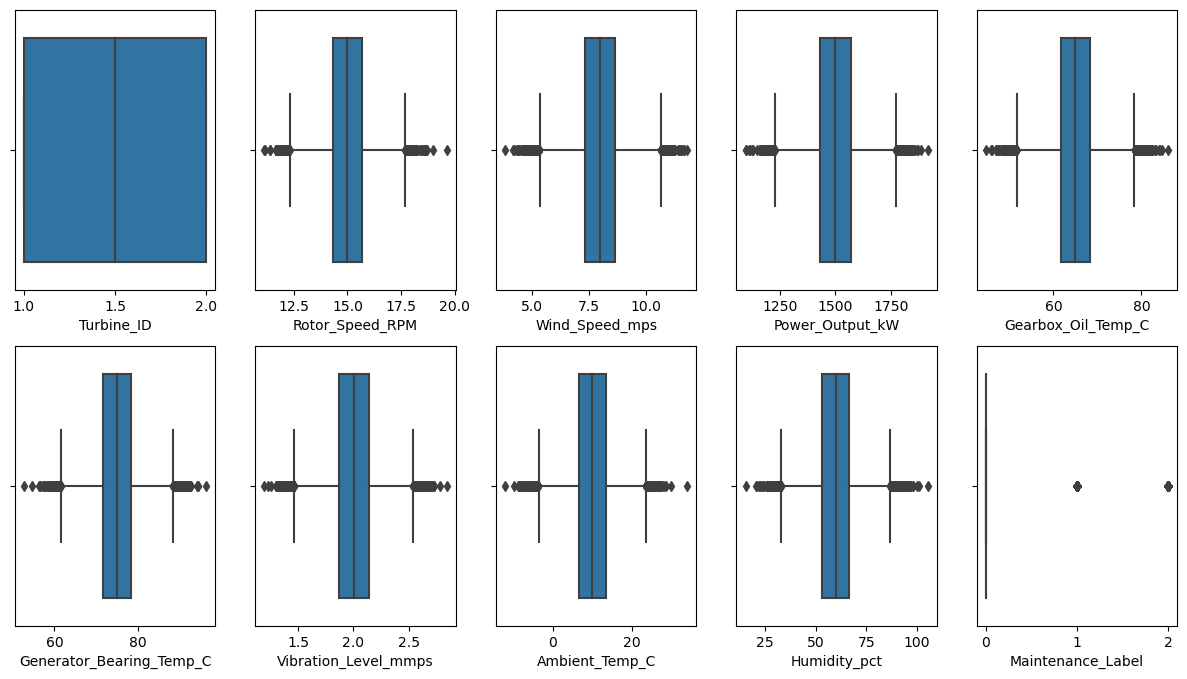

In [7]:
# check Outlires
plt.figure(figsize=(15,8))
for i, col in  enumerate(df.columns,1):
    plt.subplot(2,5,i)
    sns.boxplot(x=df[col])


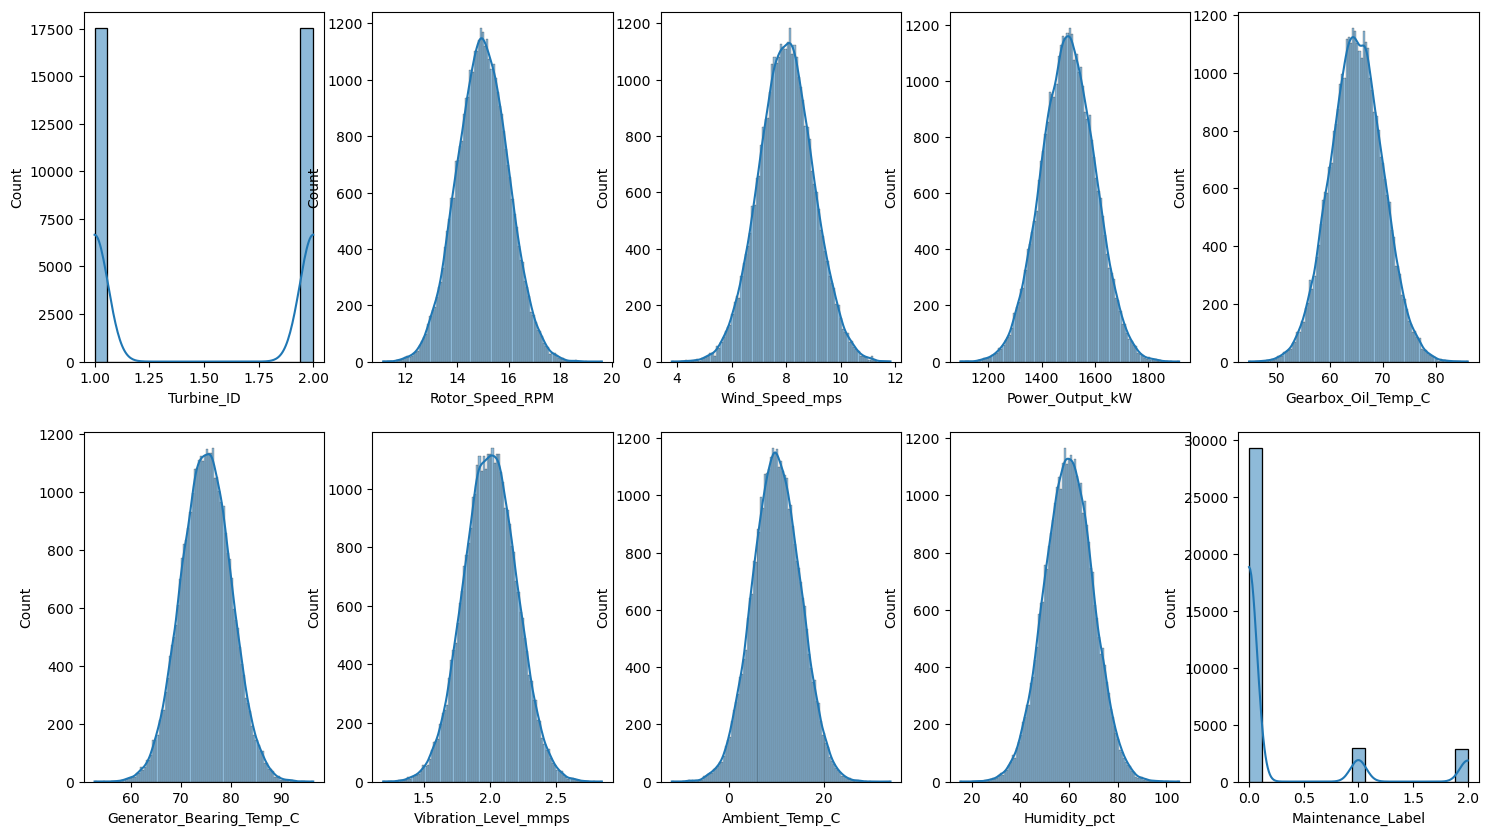

In [8]:
# check distribution of the data
plt.figure(figsize=(18,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,5,i)
    sns.histplot(df[col],kde=True)

`Note :` The Data is normally distributed

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Turbine_ID,35040.0,1.500000,0.500007,1.000000,1.000000,1.500000,2.000000,2.000000
Rotor_Speed_RPM,35040.0,14.998813,0.996711,11.139053,14.324117,14.995670,15.670454,19.616726
Wind_Speed_mps,35040.0,7.991100,1.000523,3.801420,7.322801,7.992324,8.658140,11.824992
Power_Output_kW,35040.0,1500.087340,100.308440,1096.556628,1431.894808,1500.080064,1568.095394,1914.789505
Gearbox_Oil_Temp_C,35040.0,65.007705,4.987860,44.676878,61.662044,64.991915,68.353356,86.096832
Generator_Bearing_Temp_C,35040.0,75.014411,4.985797,52.685157,71.634222,75.034723,78.401443,96.494288
Vibration_Level_mmps,35040.0,2.001254,0.198647,1.194998,1.867094,2.000812,2.136039,2.842975
Ambient_Temp_C,35040.0,10.011707,5.033105,-12.021070,6.618438,9.981060,13.411453,34.007573
Humidity_pct,35040.0,59.945455,9.991139,15.434405,53.198579,59.945151,66.668883,105.255483
Maintenance_Label,35040.0,0.247317,0.591441,0.000000,0.000000,0.000000,0.000000,2.000000


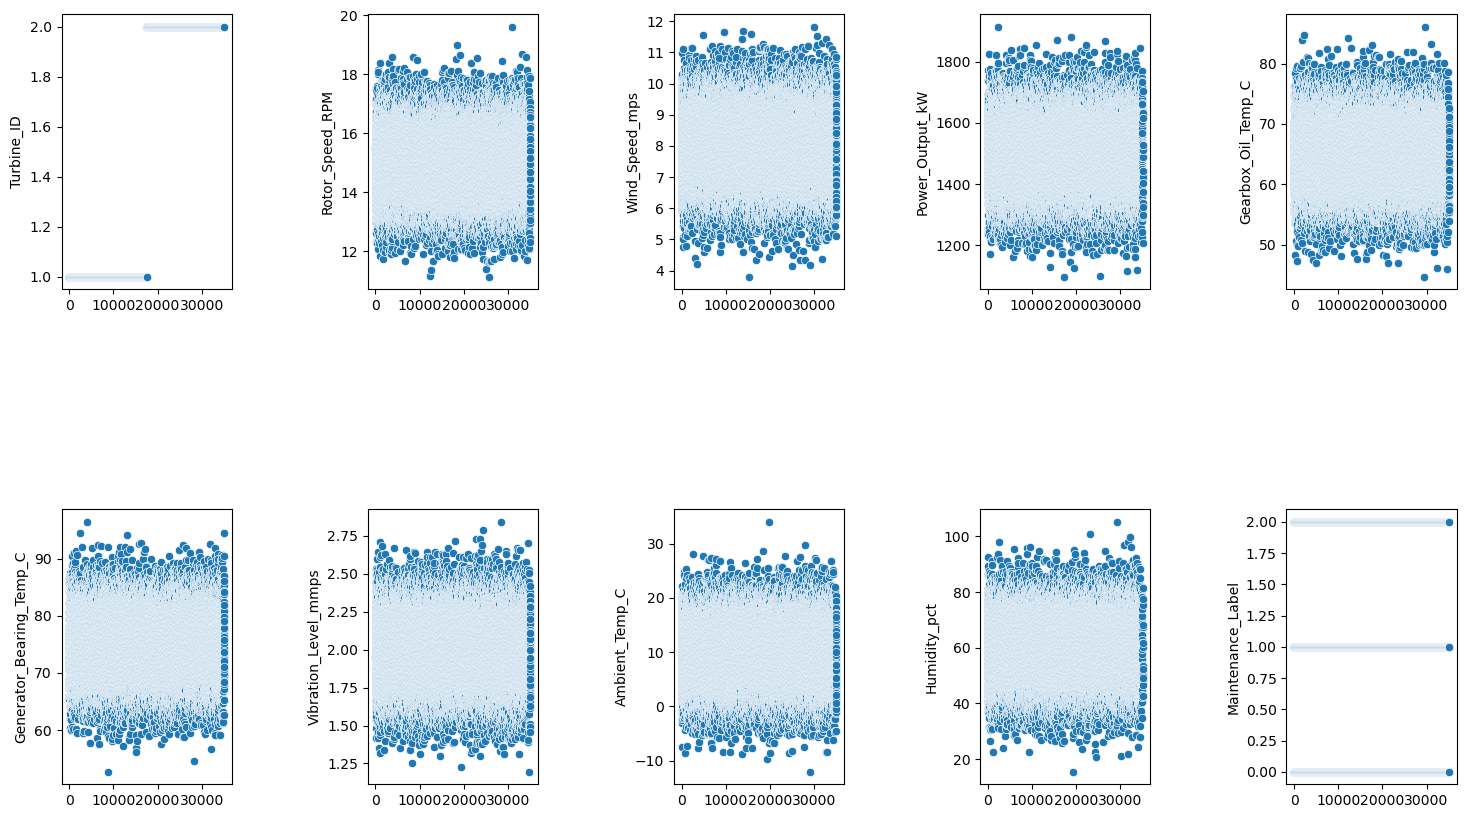

In [10]:
# check distribution of the data
plt.figure(figsize=(18,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,5,i)
    sns.scatterplot(df[col])
plt.subplots_adjust(hspace=.8,wspace=.8)

<Axes: >

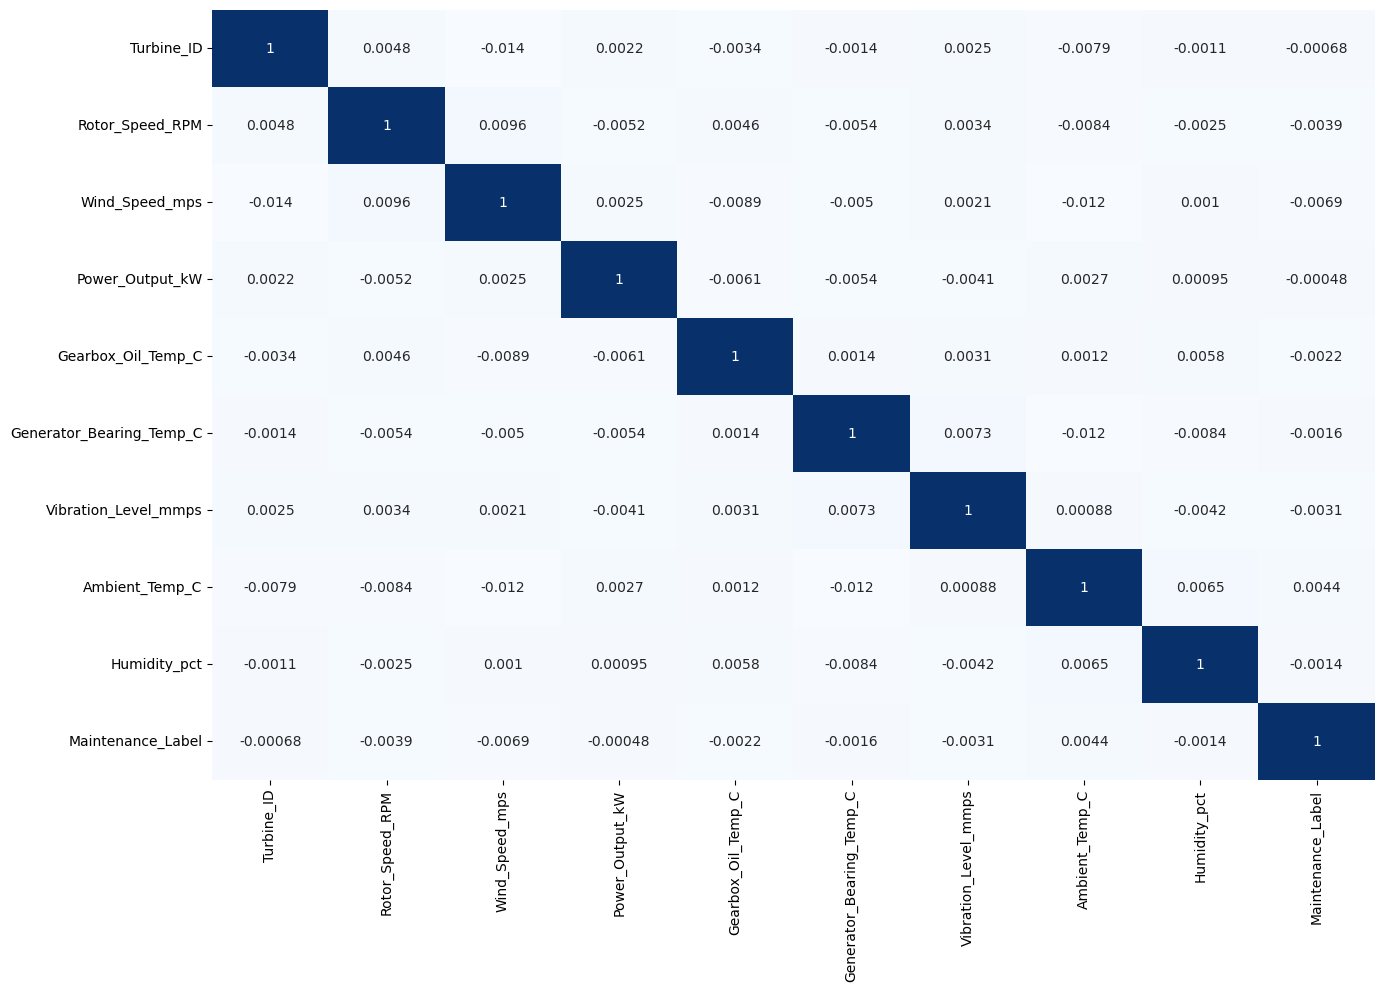

In [11]:
# Check The Relationship Between The features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar=False,cmap="Blues",annot=True)

`Note`: The Relation is very week between the target and the features

In [12]:
#Spearman correlation
for col in df.columns:
    corre,p_valeu = spearmanr(df[col],df['Maintenance_Label'])
    print(f"{col} : ")
    print(f"The correlation Value {corre}")
    print(f"P_Value {p_valeu}")
    print("-"*10)

Turbine_ID : 
The correlation Value -4.505040329756974e-06
P_Value 0.9993271701531132
----------
Rotor_Speed_RPM : 
The correlation Value -0.004257576418588033
P_Value 0.4254801767283197
----------
Wind_Speed_mps : 
The correlation Value -0.005430727521797689
P_Value 0.3093686350833414
----------
Power_Output_kW : 
The correlation Value 0.0001388694768384855
P_Value 0.9792621125749108
----------
Gearbox_Oil_Temp_C : 
The correlation Value -0.0036115127684960566
P_Value 0.4990303371870307
----------
Generator_Bearing_Temp_C : 
The correlation Value -0.0016736197630920083
P_Value 0.7540728837192053
----------
Vibration_Level_mmps : 
The correlation Value -0.0025571332563313932
P_Value 0.6321856321370432
----------
Ambient_Temp_C : 
The correlation Value 0.006549050836729615
P_Value 0.22024212124183395
----------
Humidity_pct : 
The correlation Value -0.0031896415729633946
P_Value 0.5504750629645034
----------
Maintenance_Label : 
The correlation Value 1.0
P_Value 0.0
----------


`Note`: I Do Spearman Correlation To Make sure of the relationship Between the Target and the features

<Axes: xlabel='Maintenance_Label', ylabel='count'>

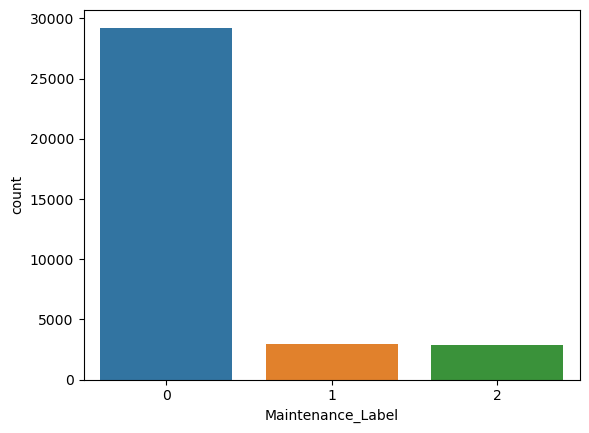

In [13]:
sns.countplot(data=df,x=df['Maintenance_Label'])

`Note`: The Data is unbalanced , We Need to do oversampling

<Axes: xlabel='Maintenance_Label', ylabel='Vibration_Level_mmps'>

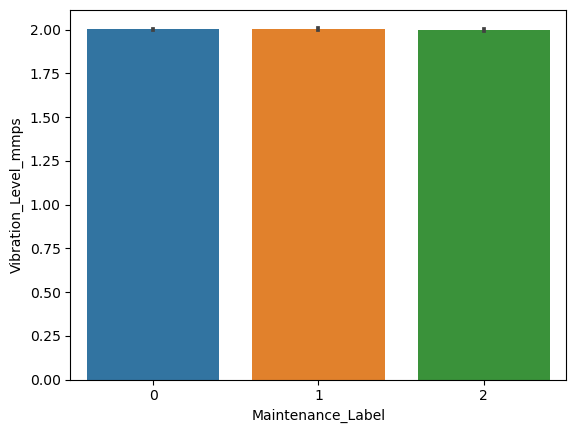

In [14]:
sns.barplot(data=df,y=df['Vibration_Level_mmps'],x=df['Maintenance_Label'])

<Axes: xlabel='Wind_Speed_mps', ylabel='Power_Output_kW'>

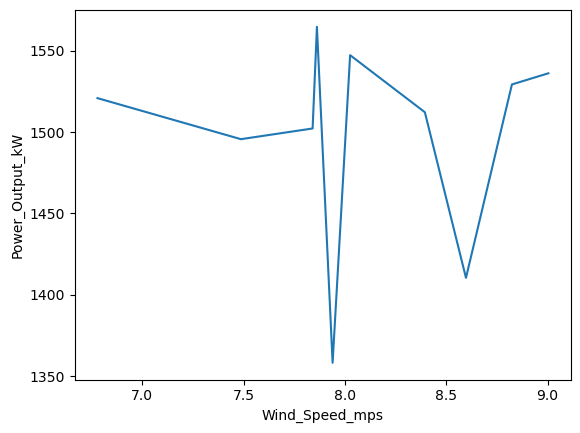

In [15]:
sns.lineplot(data=df,x=df['Wind_Speed_mps'][:10],y=df['Power_Output_kW'][:10])

### Feature Engineering

In [16]:
# إنشاء الفيتشرز الجديدة


df["Power_per_RPM"] = df["Power_Output_kW"] / df["Rotor_Speed_RPM"]
df["Vibration_per_RPM"] = df["Vibration_Level_mmps"] / df["Rotor_Speed_RPM"]
df["Temperature_Difference"] = df["Gearbox_Oil_Temp_C"] - df["Generator_Bearing_Temp_C"]
df["Temp_Wind_Ratio"] = df["Gearbox_Oil_Temp_C"] / df["Wind_Speed_mps"]
df["Temp_Ambient_Diff"] = df["Generator_Bearing_Temp_C"] - df["Ambient_Temp_C"]
df["Power_Temp_Ratio"] = df["Power_Output_kW"] / df["Gearbox_Oil_Temp_C"]
df["Vibration_Speed_Interaction"] = df["Vibration_Level_mmps"] * df["Rotor_Speed_RPM"]

# تقسيم الفيتشرز إلى فئات باستخدام Percentiles
df["Rotor_Speed_Cat"] = pd.qcut(df["Rotor_Speed_RPM"], q=3, labels=["Low", "Medium", "High"])
df["Wind_Speed_Cat"] = pd.qcut(df["Wind_Speed_mps"], q=3, labels=["Calm", "Moderate", "Strong"])
df["Power_Output_Cat"] = pd.qcut(df["Power_Output_kW"], q=3, labels=["Low", "Medium", "High"])

# تطبيق One-Hot Encoding على الفيتشرز الفئوية
categorical_features = ["Rotor_Speed_Cat", "Wind_Speed_Cat", "Power_Output_Cat"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True).astype(int)

# التأكد من عدم وجود بيانات مفقودة بعد العمليات
df.dropna(inplace=True)

# عرض أول 5 صفوف بعد التعديلات
print(df.head())





   Turbine_ID  Rotor_Speed_RPM  Wind_Speed_mps  Power_Output_kW  \
0           1               15               7             1564   
1           1               15               7             1502   
2           1               17               8             1512   
3           1               15               6             1520   
4           1               15               8             1547   

   Gearbox_Oil_Temp_C  Generator_Bearing_Temp_C  Vibration_Level_mmps  \
0                  72                        73                     1   
1                  62                        72                     1   
2                  62                        71                     2   
3                  55                        68                     2   
4                  68                        86                     2   

   Ambient_Temp_C  Humidity_pct  Maintenance_Label  ...  Temp_Wind_Ratio  \
0              17            67                  0  ...                9   
1     

In [17]:
df

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label,...,Temp_Wind_Ratio,Temp_Ambient_Diff,Power_Temp_Ratio,Vibration_Speed_Interaction,Rotor_Speed_Cat_Medium,Rotor_Speed_Cat_High,Wind_Speed_Cat_Moderate,Wind_Speed_Cat_Strong,Power_Output_Cat_Medium,Power_Output_Cat_High
0,1,15,7,1564,72,73,1,17,67,0,...,9,55,21,30,0,1,1,0,0,1
1,1,15,7,1502,62,72,1,11,52,0,...,8,61,23,29,1,0,1,0,1,0
2,1,17,8,1512,62,71,2,11,53,0,...,7,60,24,38,0,1,1,0,1,0
3,1,15,6,1520,55,68,2,13,61,0,...,8,54,27,32,0,1,0,0,1,0
4,1,15,8,1547,68,86,2,10,64,1,...,8,76,22,34,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2,14,9,1403,65,72,2,9,68,0,...,7,62,21,32,0,0,0,1,0,0
35036,2,14,8,1294,59,79,2,13,52,0,...,6,65,21,31,1,0,0,1,0,0
35037,2,15,8,1297,66,86,1,16,61,0,...,7,69,19,29,1,0,0,1,0,0
35038,2,15,8,1325,66,65,2,10,46,0,...,7,54,20,30,1,0,0,1,0,0


<Axes: >

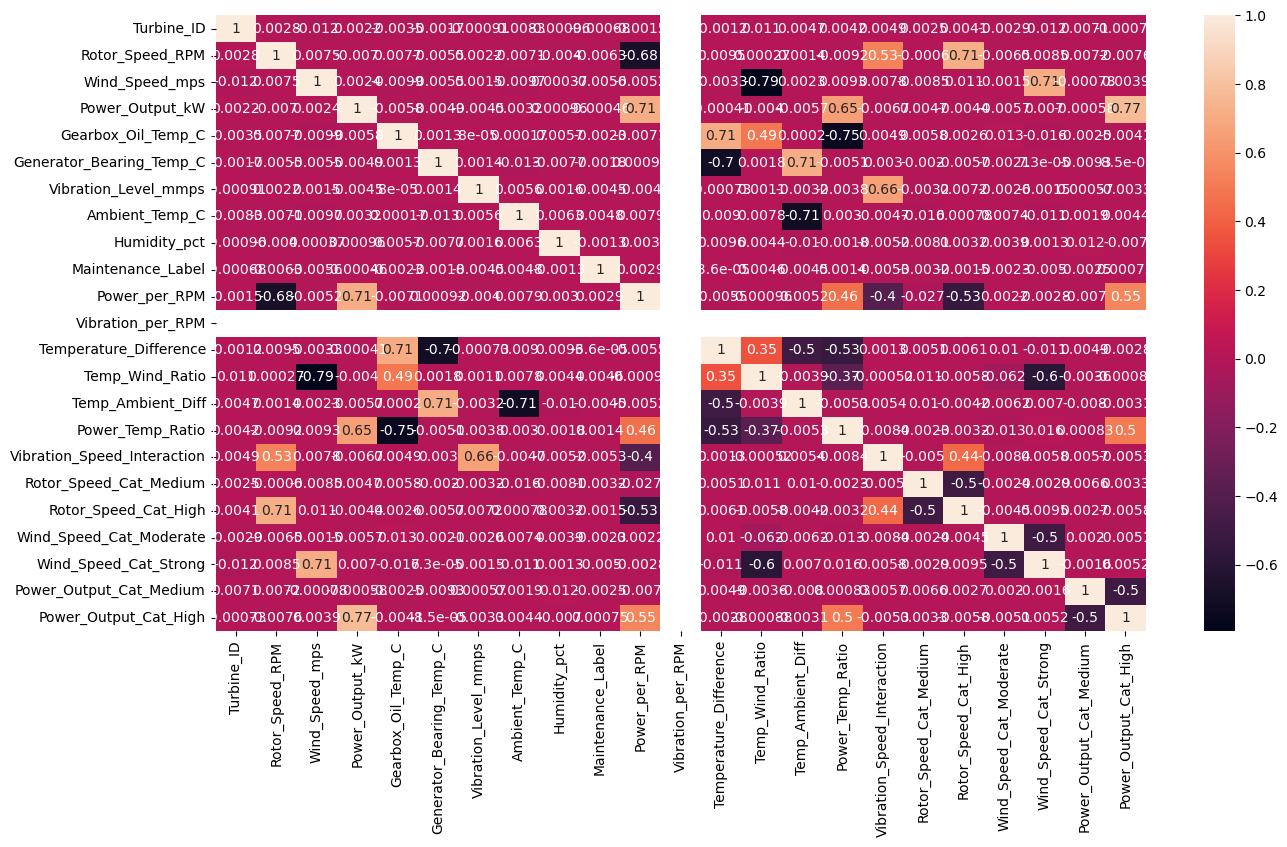

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [19]:
df.drop(["Turbine_ID", 'Vibration_per_RPM' ], axis=1, inplace=True)


In [20]:
#Spearman correlation
for col in df.columns:
    corre,p_valeu = spearmanr(df[col],df['Maintenance_Label'])
    print(f"{col} : ")
    print(f"The correlation Value {corre}")
    print(f"P_Value {p_valeu}")
    print("-"*10)

Rotor_Speed_RPM : 
The correlation Value -0.006483488328660449
P_Value 0.2248959323101733
----------
Wind_Speed_mps : 
The correlation Value -0.004744128657501062
P_Value 0.37452701224455465
----------
Power_Output_kW : 
The correlation Value 0.0001646843529926295
P_Value 0.9754082077818842
----------
Gearbox_Oil_Temp_C : 
The correlation Value -0.0038474750130052028
P_Value 0.4714112012601852
----------
Generator_Bearing_Temp_C : 
The correlation Value -0.001685101731582778
P_Value 0.7524407096891443
----------
Vibration_Level_mmps : 
The correlation Value -0.0025661627369175867
P_Value 0.6309835189257516
----------
Ambient_Temp_C : 
The correlation Value 0.0070437868654912375
P_Value 0.18733834143671593
----------
Humidity_pct : 
The correlation Value -0.0030922093225132768
P_Value 0.5627169754699058
----------
Maintenance_Label : 
The correlation Value 1.0
P_Value 0.0
----------
Power_per_RPM : 
The correlation Value 0.00440035894175108
P_Value 0.41012330284451703
----------
Tempera

In [21]:
df.columns

Index(['Rotor_Speed_RPM', 'Wind_Speed_mps', 'Power_Output_kW',
       'Gearbox_Oil_Temp_C', 'Generator_Bearing_Temp_C',
       'Vibration_Level_mmps', 'Ambient_Temp_C', 'Humidity_pct',
       'Maintenance_Label', 'Power_per_RPM', 'Temperature_Difference',
       'Temp_Wind_Ratio', 'Temp_Ambient_Diff', 'Power_Temp_Ratio',
       'Vibration_Speed_Interaction', 'Rotor_Speed_Cat_Medium',
       'Rotor_Speed_Cat_High', 'Wind_Speed_Cat_Moderate',
       'Wind_Speed_Cat_Strong', 'Power_Output_Cat_Medium',
       'Power_Output_Cat_High'],
      dtype='object')

### Data PreProcessing

In [22]:
# Handel Outlires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def handle_outliers_with_capping(data, columns=None, method='zscore', threshold=3):
   
    data = data.copy()

    if columns is None:
        columns = data.select_dtypes(include=np.number).columns.tolist()

    for col in columns:
        if method == 'zscore':
            mean = data[col].mean()
            std = data[col].std()
            lower_bound = mean - threshold * std
            upper_bound = mean + threshold * std

        elif method == 'iqr':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

        # Apply capping
        data[col] = np.clip(data[col], lower_bound, upper_bound)

    return data
df=handle_outliers_with_capping(data=df,method='iqr',columns=['Rotor_Speed_RPM', 'Wind_Speed_mps', 'Power_Output_kW',
       'Gearbox_Oil_Temp_C', 'Generator_Bearing_Temp_C',
       'Vibration_Level_mmps', 'Ambient_Temp_C', 'Humidity_pct','Power_per_RPM', 'Temperature_Difference',
       'Temp_Wind_Ratio', 'Temp_Ambient_Diff', 'Power_Temp_Ratio',
       'Vibration_Speed_Interaction'])

In [23]:
df

,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label,Power_per_RPM,...,Temp_Wind_Ratio,Temp_Ambient_Diff,Power_Temp_Ratio,Vibration_Speed_Interaction,Rotor_Speed_Cat_Medium,Rotor_Speed_Cat_High,Wind_Speed_Cat_Moderate,Wind_Speed_Cat_Strong,Power_Output_Cat_Medium,Power_Output_Cat_High
0,15.0,7.0,1564.0,72.0,73.0,1,17.0,67.0,0,100.0,...,9.0,55.0,21.0,30.0,0,1,1,0,0,1
1,15.0,7.0,1502.0,62.0,72.0,1,11.0,52.0,0,99.0,...,8.0,61.0,23.0,29.0,1,0,1,0,1,0
2,16.5,8.0,1512.0,62.0,71.0,2,11.0,53.0,0,86.0,...,7.0,60.0,24.0,38.0,0,1,1,0,1,0
3,15.0,6.0,1520.0,55.0,68.0,2,13.0,61.0,0,96.0,...,8.0,54.0,27.0,32.0,0,1,0,0,1,0
4,15.0,8.0,1547.0,68.0,86.0,2,10.0,64.0,1,99.0,...,8.0,76.0,22.0,34.0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,14.0,9.0,1403.0,65.0,72.0,2,9.0,68.0,0,99.0,...,7.0,62.0,21.0,32.0,0,0,0,1,0,0
35036,14.0,8.0,1294.0,59.0,79.0,2,13.0,52.0,0,88.0,...,6.0,65.0,21.0,31.0,1,0,0,1,0,0
35037,15.0,8.0,1297.0,66.0,86.0,1,16.0,61.0,0,84.0,...,7.0,69.0,19.0,29.0,1,0,0,1,0,0
35038,15.0,8.0,1325.0,66.0,65.0,2,10.0,46.0,0,87.0,...,7.0,54.0,20.0,30.0,1,0,0,1,0,0


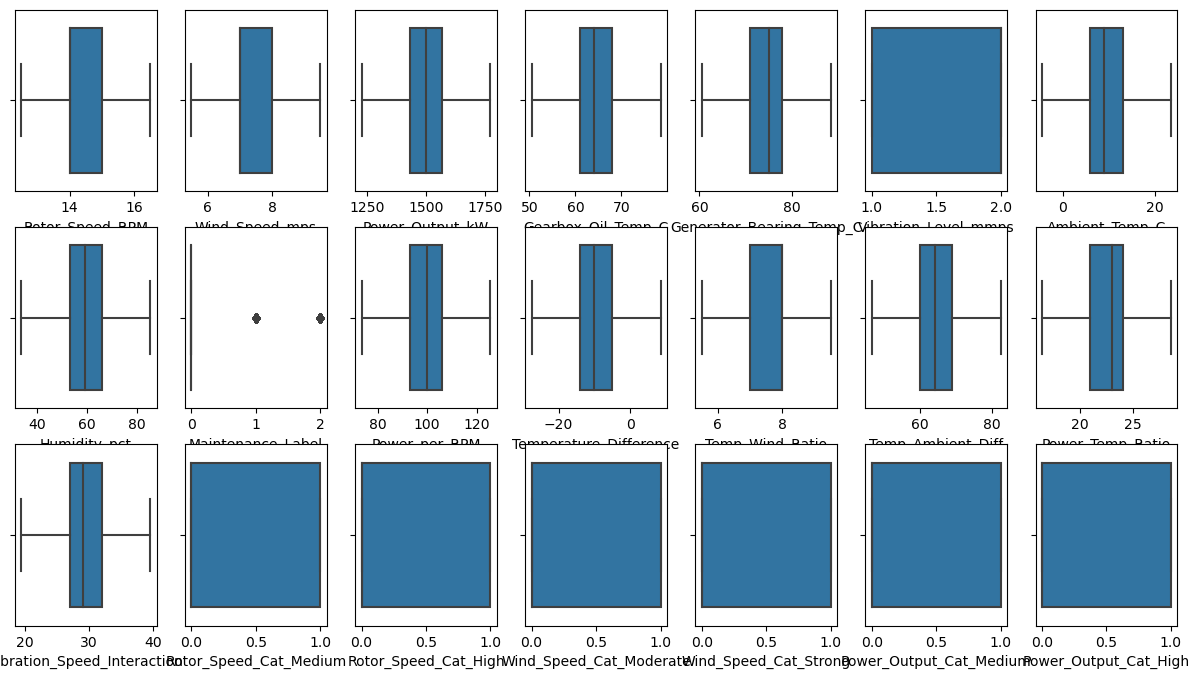

In [24]:
# check Outlires
plt.figure(figsize=(15,8))
for i, col in  enumerate(df.columns,1):
    plt.subplot(3,7,i)
    sns.boxplot(x=df[col])


In [25]:
#Split The Data
X=df.drop(columns=['Maintenance_Label'])
y=df['Maintenance_Label']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [26]:
# Oversampling the data using SMOTE 
smote =SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

In [27]:
low_importance_features = [
    "Humidity_pct", "Power_per_RPM", "Temp_Ambient_Diff",
    "Ambient_Temp_C", "Temperature_Difference", "Generator_Bearing_Temp_C"
]

x_train = x_train.drop(columns=low_importance_features)
x_test = x_test.drop(columns=low_importance_features)

### Modeling

from the results we notice that the `Random Forest Classifier` Give us the highest score so we will work with it to improve the score

In [28]:
rf = RandomForestClassifier(
    n_estimators=500,  # عدد الأشجار، 500 يعطي توازنًا بين الدقة والسرعة
    max_depth=30,  # زيادة العمق يسمح للنموذج بالتعلم أكثر
    min_samples_split=5,  # يجعل الشجرة أكثر تفصيلاً
    min_samples_leaf=5,  # يسمح بأوراق أصغر، مما يحسن القدرة على التعلم
    max_features='sqrt',  # اختيار الميزات بناءً على log2 أفضل أحيانًا من sqrt
    bootstrap=True,  # استخدام التمهيد لتحسين التعميم
    random_state=42,  # لضمان القابلية لإعادة الإنتاج
    n_jobs=-1  # استخدام كل الأنوية المتاحة لتسريع التدريب
)

rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
xgb = XGBClassifier(
    n_estimators=1000,  
    learning_rate=0.01, 
    max_depth=10,  
    min_child_weight=1, 
    gamma=0.1, 
    subsample=0.85,  
    colsample_bytree=0.85,  
    reg_alpha=0.001,  
    reg_lambda=1,  
    objective="multi:softmax",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb.fit(x_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softmax', ...)

In [30]:
y_train_pred_xgb=xgb.predict(x_train)

In [31]:
y_train_pred=rf.predict(x_train)

In [32]:
f1_score(y_train,y_train_pred,average='weighted')

0.9214699225284646

In [33]:
f1_score(y_train,y_train_pred_xgb,average='weighted')

0.9138320540936791

In [34]:
y_pred=rf.predict(x_test)

In [35]:
y_pred_xgb=xgb.predict(x_test)

In [36]:
f1_score(y_test,y_pred,average='weighted')

0.769402970703374

In [37]:
f1_score(y_test,y_pred_xgb,average='weighted')

0.7690430162988291

In [38]:
test=pd.read_csv('wind_turbine_maintenance_test_data.csv')

In [ ]:

test["Power_per_RPM"] = test["Power_Output_kW"] / test["Rotor_Speed_RPM"]
test["Vibration_per_RPM"] = test["Vibration_Level_mmps"] / test["Rotor_Speed_RPM"]
test["Temperature_Difference"] = test["Gearbox_Oil_Temp_C"] - test["Generator_Bearing_Temp_C"]
test["Temp_Wind_Ratio"] = test["Gearbox_Oil_Temp_C"] / test["Wind_Speed_mps"]
test["Temp_Ambient_Diff"] = test["Generator_Bearing_Temp_C"] - test["Ambient_Temp_C"]
test["Power_Temp_Ratio"] = test["Power_Output_kW"] / test["Gearbox_Oil_Temp_C"]
test["Vibration_Speed_Interaction"] = test["Vibration_Level_mmps"] * test["Rotor_Speed_RPM"]

test["Rotor_Speed_Cat"] = pd.qcut(test["Rotor_Speed_RPM"], q=3, labels=["Low", "Medium", "High"])
test["Wind_Speed_Cat"] = pd.qcut(test["Wind_Speed_mps"], q=3, labels=["Calm", "Moderate", "Strong"])
test["Power_Output_Cat"] = pd.qcut(test["Power_Output_kW"], q=3, labels=["Low", "Medium", "High"])

categorical_features = ["Rotor_Speed_Cat", "Wind_Speed_Cat", "Power_Output_Cat"]
test = pd.get_dummies(test, columns=categorical_features, drop_first=True).astype(int)

test.dropna(inplace=True)

print(test.head())


   Turbine_ID  Rotor_Speed_RPM  Wind_Speed_mps  Power_Output_kW  \
0           1               16               7             1468   
1           1               14               8             1793   
2           1               16               9             1492   
3           1               13               6             1514   
4           1               16               5             1487   

   Gearbox_Oil_Temp_C  Generator_Bearing_Temp_C  Vibration_Level_mmps  \
0                  60                        69                     1   
1                  58                        74                     2   
2                  57                        77                     2   
3                  57                        80                     1   
4                  68                        72                     2   

   Ambient_Temp_C  Humidity_pct  Maintenance_Label  ...  Temp_Wind_Ratio  \
0              12            62                  2  ...                8   
1     

In [43]:
#Split The Data
testx=test.drop(columns=['Maintenance_Label','Turbine_ID','Vibration_per_RPM', "Humidity_pct", "Power_per_RPM", "Temp_Ambient_Diff",
    "Ambient_Temp_C", "Temperature_Difference", "Generator_Bearing_Temp_C"])
testy=test['Maintenance_Label']




In [41]:
test

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label,...,Temp_Wind_Ratio,Temp_Ambient_Diff,Power_Temp_Ratio,Vibration_Speed_Interaction,Rotor_Speed_Cat_Medium,Rotor_Speed_Cat_High,Wind_Speed_Cat_Moderate,Wind_Speed_Cat_Strong,Power_Output_Cat_Medium,Power_Output_Cat_High
0,1,16,7,1468,60,69,1,12,62,2,...,8,56,24,27,0,1,0,0,1,0
1,1,14,8,1793,58,74,2,13,40,0,...,6,60,30,29,0,0,0,1,0,1
2,1,16,9,1492,57,77,2,18,62,0,...,5,59,26,33,0,1,0,1,1,0
3,1,13,6,1514,57,80,1,14,48,0,...,8,66,26,24,0,0,0,0,1,0
4,1,16,5,1487,68,72,2,16,62,0,...,11,55,21,33,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2,15,8,1474,59,86,1,17,73,2,...,6,69,24,28,1,0,0,1,1,0
35036,2,16,9,1608,66,63,2,7,47,0,...,7,56,24,35,0,1,0,1,0,1
35037,2,14,6,1441,68,74,2,11,43,0,...,9,63,21,30,0,0,0,0,0,0
35038,2,16,6,1439,56,80,1,10,71,0,...,8,70,25,30,0,1,0,0,0,0


In [44]:
pred_test=rf.predict(testx)

In [45]:
pred_test_xgb=xgb.predict(testx)

In [ ]:
f1_score(testy,pred_test,average="weighted")

0.7657776227312941

In [46]:
f1_score(testy,pred_test_xgb,average="weighted")

0.7660719722034647

In [47]:
sub=pd.read_csv('submission.csv')

In [48]:
sub

,ID,Maintenance_Label,Usage
0,1_0,2,Public
1,1_1,0,Private
2,1_2,0,Private
3,1_3,0,Public
4,1_4,0,Public
...,...,...,...
35035,2_35035,2,Public
35036,2_35036,0,Public
35037,2_35037,0,Public
35038,2_35038,0,Public


In [49]:
sub['Maintenance_Label']=pred_test_xgb
sub.drop(columns=['Usage'],inplace=True)

In [50]:
sub

,ID,Maintenance_Label
0,1_0,0
1,1_1,0
2,1_2,0
3,1_3,0
4,1_4,0
...,...,...
35035,2_35035,0
35036,2_35036,0
35037,2_35037,0
35038,2_35038,2


In [51]:
sub.to_csv("sub.csv",index=False)